In [1]:
from sympy import *
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()
import modern_robotics as mr
import numpy as np
from Utilities.symbolicFunctions import*

### Functions & variables from former tasks

#### Functions

In [2]:
def Js_maker(Slist, theta_list):
    n_joints = Slist.shape[1]
    Js = zeros(6, n_joints)

    for i in range(n_joints-1, -1, -1):
        if i==0: # legger til denne for å få Js[0] = S_sb[0], står i boka
            Js[:,i] = Slist[:,i]
                    
        else:
            T = exp6(Slist[:,i-1], theta_list[i-1])

            for j in range( i-2, -1, -1):
                T = exp6(Slist[:,j], theta_list[j]) * T

        Js[:,i] = Ad(T) * Slist[:,i]
        

    Js.simplify()
    return Js

def Jb_maker(Blist, theta_list):
    n_joints = Blist.shape[1] - 1
    Jb = zeros(6, 6)
    print(n_joints)
    
    Jb[:,n_joints] = Blist[:,n_joints] # Jb[n] = B[n]
    
    for i in range(n_joints-1, -1, -1):
        T = eye(4)  #exp6(Blist[:,i], -theta_list[i])
        print("i",i)
        for j in range( i+1, n_joints+1):
            T = exp6(Blist[:,j], -theta_list[j]) * T
            print("j",j)
        Jb[:,i] = Ad(T) * Blist[:,i]
        print("\n")
    
    return Jb





#### Variables

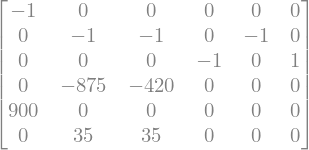

In [3]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')

S_bp = Matrix([[-1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [0, -875, -420, 0, 0, 0], [-900, 0, 0, 0, 0, 0], [0, -35, -35, 0, 0, 0]])
S_bp = Matrix([[-1, 0, 0, 0, 0, 0], [0, -1, -1, 0, -1, 0], [0, 0, 0, -1, 0, 1], [0, -875, -420, 0, 0, 0], [900, 0, 0, 0, 0, 0], [0, 35, 35, 0, 0, 0]])
S_bp

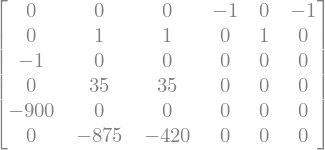

In [4]:
##___Markus____
def Jb_maker6x6(Blist): #Foreløpig for 6x6
    Jb = sp.zeros(6,6)
    Jb[:,5] =  Blist[:,5]
    Jb[:,4] =  Ad(exp6(-Blist[:,5], th5)) * Blist[:,4]
    Jb[:,3] =  Ad(exp6(-Blist[:,5], th5) * exp6(-Blist[:,4], th4)) * Blist[:,3]
    Jb[:,2] =  Ad(exp6(-Blist[:,5], th5) * exp6(-Blist[:,4], th4) * exp6(-Blist[:,3], th3)) * Blist[:,2]
    Jb[:,1] =  Ad(exp6(-Blist[:,5], th5) * exp6(-Blist[:,4], th4) * exp6(-Blist[:,3], th3) * exp6(-Blist[:,2], th2)) * Blist[:,1]
    Jb[:,0] =  Ad(exp6(-Blist[:,5], th5) * exp6(-Blist[:,4], th4) * exp6(-Blist[:,3], th3) * exp6(-Blist[:,2], th2) * exp6(-Blist[:,1], th1)) * Blist[:,0]
    
    return Jb

om = sp.zeros(3, 6)
om6 = om[:, 5] = Matrix([-1,0,0])
om5 = om[:, 4] = Matrix([0,1,0])
om4 = om[:, 3] = Matrix([-1,0,0])
om3 = om[:, 2] = Matrix([0,1,0])
om2 = om[:, 1] = Matrix([0,1,0])
om1 = om[:, 0] = Matrix([0,0,-1])

q = sp.zeros(3,6)
q6 = q[:,5] = Matrix([0,0,0])
q5 = q[:,4] = Matrix([0,0,0])
q4 = q[:,3] = Matrix([0,0,0])
q3 = q[:,2] = Matrix([-420,0,-35])
q2 = q[:,1] = Matrix([-420-455,0,-35])
q1 = q[:,0] = Matrix([-420-455-25,0,-435])


Blist = Slist_maker(om,q)#Blist med B6 posisjon som {6}, orientert som {s}
Blist

In [5]:
Jb = Jb_maker6x6(Blist)

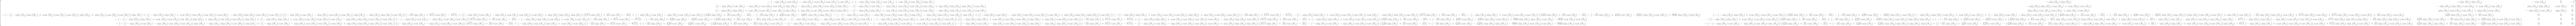

In [6]:
Jb

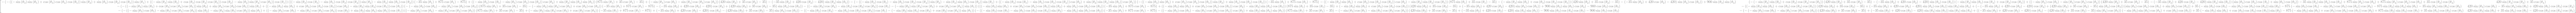

In [7]:
Jb_arm = zeros(3,3) # Arm (position)
Jb_wrist = zeros(3,3) # Wrist (rotation)

Jb_wrist = Jb[0:3,3:6]
Jb_arm = Jb[3:6,0:3]

Jb_arm

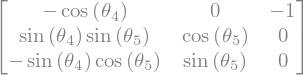

In [8]:
Jb_wrist

In [9]:
det_arm = Jb_arm.det()
det_arm

               2        3        4        2        4                    2     
- 154350000⋅sin (θ₁)⋅sin (θ₂)⋅sin (θ₃)⋅sin (θ₄)⋅sin (θ₅) - 308700000⋅sin (θ₁)⋅

   3        4        2        2        2                    2        3        
sin (θ₂)⋅sin (θ₃)⋅sin (θ₄)⋅sin (θ₅)⋅cos (θ₅) - 154350000⋅sin (θ₁)⋅sin (θ₂)⋅sin

4        2        4                    2        3        4        4        2  
 (θ₃)⋅sin (θ₄)⋅cos (θ₅) - 154350000⋅sin (θ₁)⋅sin (θ₂)⋅sin (θ₃)⋅sin (θ₅)⋅cos (θ

                  2        3        4        2        2        2              
₄) - 308700000⋅sin (θ₁)⋅sin (θ₂)⋅sin (θ₃)⋅sin (θ₅)⋅cos (θ₄)⋅cos (θ₅) - 1543500

      2        3        4        2        4                  2        3       
00⋅sin (θ₁)⋅sin (θ₂)⋅sin (θ₃)⋅cos (θ₄)⋅cos (θ₅) - 1071875⋅sin (θ₁)⋅sin (θ₂)⋅si

 2        4        4                    2        3        2        4        2 
n (θ₃)⋅sin (θ₄)⋅sin (θ₅) - 154350000⋅sin (θ₁)⋅sin (θ₂)⋅sin (θ₃)⋅sin (θ₄)⋅sin (

       2                  2        3        2 

In [10]:
Jb_wrist.simplify()

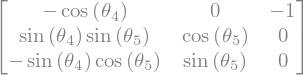

In [11]:
Jb_wrist

In [12]:
det_wrist = Jb_wrist.det()
det_wrist

In [13]:
singularitiesArm = solve(det_arm,th1,th2,th3,th4,th4,th5,th6)
singularitiesArm

## Le task

In [ ]:
singularitiesWrist = solve(det_wrist,th1,th2,th3,th4,th4,th5,th6) ##Solver ikke...
singularitiesWrist
#_______Markus slutt______

In [ ]:
Jb = Jb_maker(Blist, [th1,th2,th3,th4,th5,th6])


5
i 4


AttributeError: module 'sympy' has no attribute 'exp6'

In [ ]:
Jb

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣-((((-35⋅sin(θ₂) + 875⋅cos(θ₂) - 875)⋅sin(θ₃) + (875⋅sin(θ₂) + 35⋅cos(θ₂) - 3

                                                                              
                                                   

In [ ]:
Jb_12 = zeros(3,3) # Arm
Jb_21 = zeros(3,3) # Wrist

Jb_12 = Jb[0:3,3:6]
Jb_21 = Jb[3:6,0:3]

Jb_21


⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣-((((-35⋅sin(θ₂) + 875⋅cos(θ₂) - 875)⋅sin(θ₃) + (875⋅sin(θ₂) + 35⋅cos(θ₂) - 3

            -(-(((-35⋅sin(θ₂) + 875⋅cos(θ₂) - 875)⋅sin(θ₃) + (875⋅sin(θ₂) + 35
                                                                              
            -(-(((-35⋅sin(θ₂) + 875⋅cos(θ₂) - 875)⋅sin(θ₃) + (875⋅sin(θ₂) + 35
                                                                              
5)⋅cos(θ₃) + 420⋅sin(θ₃) + 35⋅cos(θ₃) - 35)⋅cos(θ₄)⋅cos(θ₅) + ((-35⋅sin(θ₂) + 

⋅cos(θ₂) - 35)⋅cos(θ₃) + 420⋅sin(θ₃) + 35⋅cos(θ₃) - 35)⋅cos(θ₄)⋅cos(θ₅) + ((-3
                                                                              
⋅cos(θ₂) - 35)⋅cos(θ₃) + 420⋅sin(θ₃) + 35⋅cos(θ₃) 

In [ ]:
det_Jb_12 = Jb_12.det()
det_Jb_12

           2                  2    
sin(θ₅)⋅sin (θ₆) + sin(θ₅)⋅cos (θ₆)

In [ ]:
det_Jb_21 = Jb_21.det()

In [ ]:
a = det_Jb_21.subs(th4,0)
b = a.subs(th5, 0)
c = b.subs(th6, 0)
d = c.subs(th1, 0)

d.simplify()


                                                79704625⋅sin(θ₂ + 2⋅θ₃)   8081
43475250⋅sin(θ₂ - θ₃) - 43475250⋅sin(θ₂ + θ₃) - ─────────────────────── + ────
                                                           2                  

9375⋅sin(θ₂)                     7245875⋅cos(θ₂ - θ₃)   7245875⋅cos(θ₂ + θ₃)  
──────────── - 4777500⋅sin(θ₃) + ──────────────────── + ──────────────────── +
   2                                      2                      2            

                                        
 6688500⋅cos(θ₂ + 2⋅θ₃) + 398125⋅cos(θ₃)
                                        

In [ ]:
# s = solve(d, th2, th3)

In [ ]:
solutionArm = solve(det_Jb_12,th1,th2,th3,th4,th4,th5,th6)
solutionArm

[{θ₅: 0}, {θ₅: π}]